In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = nn.Linear(4, 64)
        self.dense2 = nn.Linear(64, 2)

        nn.init.zeros_(self.dense1.bias)
        nn.init.zeros_(self.dense2.bias)
        
        nn.init.kaiming_normal_(self.dense1.weight, nonlinearity='relu')
        with torch.no_grad():
            self.dense2.weight *= 0.1

    def forward(self, x):
        x = F.relu(self.dense1(x))
        x = F.softmax(self.dense2(x), dim=1)
        return x

In [2]:
from trainer import Reinforce
import gymnasium as gym

EPISODES = 4000

env = gym.make("CartPole-v1", render_mode="rgb_array")

policy = Model()
optimizer = torch.optim.Adam(policy.parameters(), lr=1e-3)

reinforce = Reinforce(env, policy, optimizer, discount=0.99)
rewards, losses = reinforce.train(episodes=EPISODES, stats_interval=500)


New max of 22.0 in episode 1
New max of 40.0 in episode 9
New max of 96.0 in episode 55
New max of 99.0 in episode 100
New max of 112.0 in episode 137
New max of 113.0 in episode 160
New max of 135.0 in episode 175
New max of 140.0 in episode 196
New max of 142.0 in episode 207
New max of 168.0 in episode 209
New max of 169.0 in episode 210
New max of 195.0 in episode 226
New max of 252.0 in episode 231
New max of 295.0 in episode 280
New max of 312.0 in episode 306
New max of 396.0 in episode 349
New max of 405.0 in episode 368
New max of 429.0 in episode 385
New max of 486.0 in episode 396
New max of 500.0 in episode 455
Episodes (0, 499): Avg Loss- -1.1920633646249772 Avg Reward- 129.422
Episodes (500, 999): Avg Loss- -2.7004017869830133 Avg Reward- 326.04
Episodes (1000, 1499): Avg Loss- -2.28841739192605 Avg Reward- 352.29
Episodes (1500, 1999): Avg Loss- -3.407149664282799 Avg Reward- 393.216
Episodes (2000, 2499): Avg Loss- -3.1006326577663423 Avg Reward- 397.308
Episodes (2500,

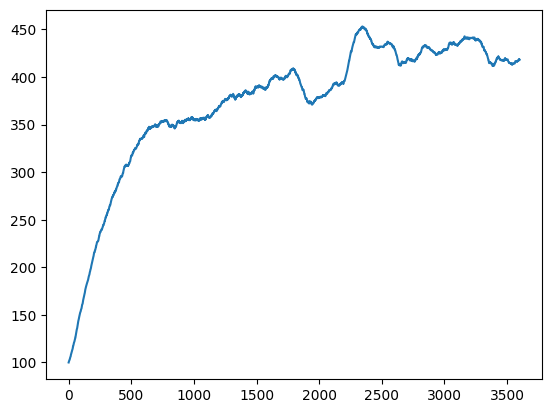

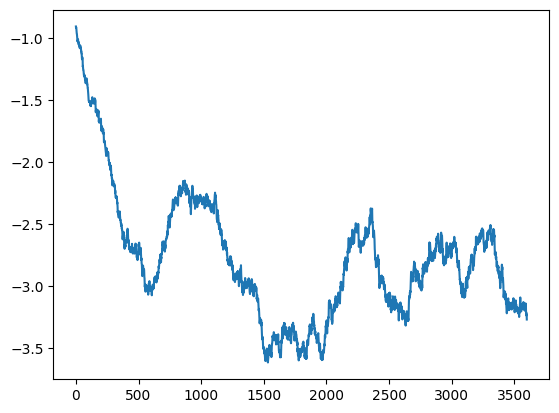

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from trainer import moving_average

plt.figure()
plt.plot(moving_average(rewards, int(EPISODES/10)))
plt.figure()
plt.plot(moving_average(losses, int(EPISODES/10)))

In [4]:
from IPython.display import HTML

HTML(reinforce.playback())

Playback Return: 500.0


In [5]:
reinforce.eval(episodes=500)

Average Return over 500 episodes: 500.0


In [6]:
reinforce.save("models/cart_pole/REINFORCE_500")